<a href="https://colab.research.google.com/github/juntaoduan/Data-science-best-resources/blob/master/gradient_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries and Data**

In [1]:
!wget https://raw.githubusercontent.com/juntaoduan/Machine-Learning-with-Python/master/Datasets/UniversalBank.csv

--2022-03-17 15:43:55--  https://raw.githubusercontent.com/juntaoduan/Machine-Learning-with-Python/master/Datasets/UniversalBank.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205669 (201K) [text/plain]
Saving to: ‘UniversalBank.csv’

UniversalBank.csv   100%[===================>] 200.85K  --.-KB/s    in 0.05s   

2022-03-17 15:43:55 (4.11 MB/s) - ‘UniversalBank.csv’ saved [205669/205669]



In [2]:
pip install scikit-plot

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,\
    classification_report, confusion_matrix, accuracy_score
import scikitplot as skplt

data = pd.read_csv("UniversalBank.csv")

display(data)

# train = pd.read_csv("../input/titanic/train.csv")
# test  = pd.read_csv('../input/titanic/test.csv')
# train

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# **Goal**: Can you determine whether a customer (given first 13 features) will open a credit card with the bank?

## split train/test data

In [4]:
X = data.iloc[:,1:13].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

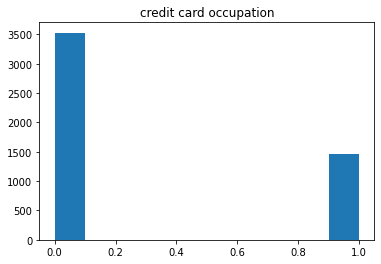

In [5]:
plt.hist(y)
plt.title('credit card occupation')
plt.show()

# Support Vector Machine 
**Support Vector Machines is a classier method that performs classification tasks by constructing hyperplanes in a multidimensional space that separates cases of different class labels. SVM supports both regression and classification tasks and can handle multiple continuous and categorical variables 
**

**Libraries**

In [6]:
from sklearn.svm import SVC

**Model and Accuracy**

0.7008


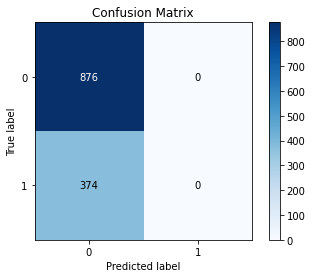

In [7]:
svmc = SVC(kernel = 'rbf', random_state = 0)
svmc.fit(X_train, y_train)

# print(classification_report(y_test,y_pred))
print( svmc.score(X_test, y_test) )
y_test_pred = svmc.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred)

SVM fails to identify all 374 potential customers 

# Sklearn Gradient Boosting
**Gradient boosting is an alogithm under supervised machine learning, boosting means converting weak into strong.**

**Libraries**

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

**Model and Accuracy**

In [9]:

# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
gbk = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=7, random_state=0)
gbk.fit(X_train, y_train)
gbk.score(X_test, y_test)

0.7096

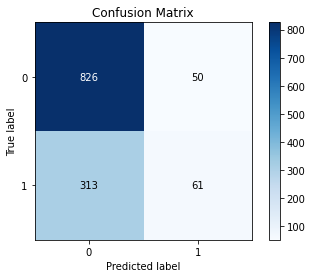

In [10]:
y_test_pred = gbk.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred)

Sklearn-GBM identified 61 potential customers 

# Light GBM

**LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:**

1. Faster training speed and higher efficiency.
2. Lower memory usage.
3. Better accuracy.
4. Support of parallel and GPU learning.
5. Capable of handling large-scale data.

**Library**

In [11]:
import lightgbm as lgbm
# https://lightgbm.readthedocs.io/en/latest/Python-Intro.html
# https://github.com/microsoft/LightGBM


**Model and Accuracy**

0.7312


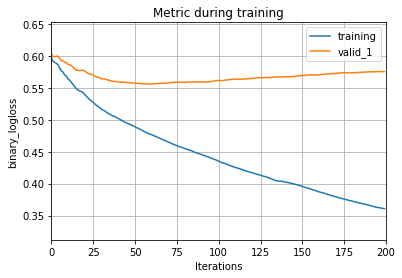

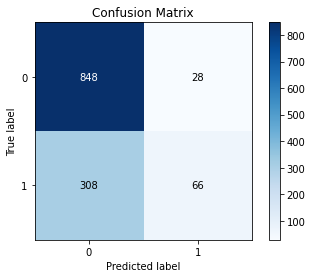

In [12]:
m_lgb = lgbm.LGBMClassifier(objective='binary', 
                            n_estimators=200, 
                            learning_rate=0.05, 
                            max_depth=7,
                            max_bin = 55, 
                            bagging_fraction = 0.8,
                            bagging_freq = 5, 
                            feature_fraction = 0.8,
                            min_data_in_leaf =6, 
                            silent= -1)
# https://github.com/microsoft/LightGBM/blob/master/docs/Parameters.rst
eval_set = [(X_train, y_train), (X_test, y_test)]
m_lgb.fit(X_train, y_train, eval_set=eval_set, verbose=0)
print(m_lgb.score(X_test, y_test))
lgbm.plot_metric(m_lgb)
y_test_pred = m_lgb.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred)
plt.show()

**LGBM identified 66 potential customers** 👍

# **XGBoost**

**XGBoost is a decision-tree-based ensemble method that uses gradient boosting framework. It is a perfect combination of software and hardware optimization techniques to yield superior results.**

**Library and Data**

In [13]:
import xgboost as xgb
# https://xgboost.readthedocs.io/en/stable/python/index.html

**Model and Accuracy**

0.7288


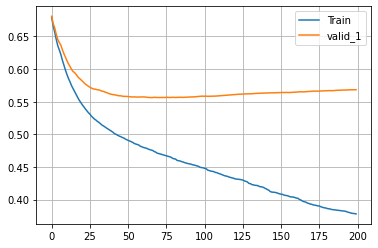

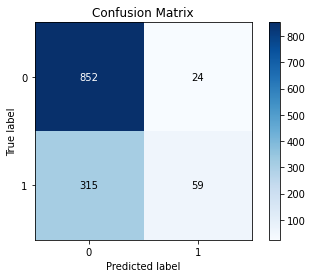

In [14]:
m_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                          n_estimators=200, 
                          learning_rate=0.05, 
                          max_depth=7, 
                          colsample_bytree=0.8,
                          random_state =7, 
                          nthread = -1)
eval_set = [(X_train, y_train), (X_test, y_test)]
m_xgb.fit(X_train, y_train, eval_set=eval_set, eval_metric='logloss', verbose=0)
print(m_xgb.score(X_test, y_test))
res = m_xgb.evals_result()
plt.plot(res['validation_0']['logloss'], label='Train')
plt.plot(res['validation_1']['logloss'], label='valid_1')
plt.legend()
plt.grid()
y_test_pred = m_xgb.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred)

# Catboost

**Catboost is a type of gradient boosting algorithms which can  automatically deal with categorical variables without showing the type conversion error, which helps you to focus on tuning your model better rather than sorting out trivial errors.Make sure you handle missing data well before you proceed with the implementation.
**

In [15]:
pip install catboost

     |████████████████████████████████| 76.1 MB 54 kB/s 


In [16]:
import catboost as cgb
# https://catboost.ai/en/docs/concepts/python-quickstart

In [17]:
m_cgb = cgb.CatBoostClassifier(n_estimators=200,
                               learning_rate=0.05,
                               max_depth=7,
                               min_data_in_leaf= 2, 
                               colsample_bylevel=0.8,
                               random_state =7)
eval_set = [(X_test, y_test)]
m_cgb.fit(X_train, y_train, eval_set=eval_set,  verbose=0)

print(m_cgb.score(X_test, y_test))


0.7416


In [ ]:
%%capture cap --no-stderr
m_cgb.fit(X_train, y_train, eval_set=eval_set,  verbose=1)


In [19]:
epoc = cap.stdout.split('\n')
import re
loss = np.zeros((200,2))
for i in range(200):
    temp = re.split('\t| ', epoc[i])
    loss[i,0]= temp[2] # train loss
    loss[i,1]= temp[4] # test loss
plt.plot(loss[:,0], label='Train')
plt.plot(loss[:,1], label='valid_1')
plt.legend()
plt.grid()
y_test_pred = m_cgb.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred)

IndexError: ignored

# Bonus Question: Why GBM only identified around 60 out of 374 customers in the test data set? Can you help the bank to improve?

Hint: Remember the classes are very imblanced 70% 0's, 30% 1's